# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_BTC = requests.get(btc_url)
btc_price=response_BTC.content
btc_price_data=response_BTC.json()
# Fetch current ETH price
response_ETH = requests.get(eth_url)
eth_price=response_ETH.content
eth_price_data=response_ETH.json()

print(json.dumps(btc_price_data, indent=4))
print(json.dumps(eth_price_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18993562,
            "total_supply": 18993562,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 44353.0,
                    "volume_24h": 26788199405,
                    "market_cap": 843549676690,
                    "percentage_change_1h": 0.0103030337469916,
                    "percentage_change_24h": 1.06856202361055,
                    "percentage_change_7d": 8.17377303546413,
                    "percent_change_1h": 0.0103030337469916,
                    "percent_change_24h": 1.06856202361055,
                    "percent_change_7d": 8.17377303546413
                },
                "CAD": {
                    "price": 55467.8618,
                    "volume_24h": 33501322175.893,
                    "m

In [6]:
# Compute current value of my crpto
btccurrent_price=btc_price_data["data"]["1"]["quotes"]["USD"]["price"]
ethcurrent_price=eth_price_data["data"]["1027"]["quotes"]["USD"]["price"]
my_btc_value=btccurrent_price*my_btc
my_eth_value=ethcurrent_price*my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $53223.60
The current value of your 5.3 ETH is $16511.30


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca=tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="V2")

In [9]:
# Format current date as ISO format
from datetime import datetime
today = pd.Timestamp("2022-03-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe='1D'
from alpaca_trade_api.rest import REST, TimeFrame
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
## There are 2 tickers in the Dataframe so I use limit=2000 to get 1000 days of data
portfolio_price= alpaca.get_bars(tickers, TimeFrame.Day, "2018-04-03", "2022-03-21",limit=2000, adjustment='raw').df

# Preview DataFrame
portfolio_price.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-04-03 04:00:00+00:00,106.82,106.8700,106.740,106.78,9916091,33232,106.808401,AGG
2018-04-04 04:00:00+00:00,106.90,106.9267,106.791,106.82,6200937,17851,106.839944,AGG
2018-04-05 04:00:00+00:00,106.71,106.7600,106.630,106.67,2592453,11216,106.679372,AGG
2018-04-06 04:00:00+00:00,106.89,106.9763,106.790,106.91,2814781,12014,106.905096,AGG
2018-04-09 04:00:00+00:00,106.83,107.0000,106.780,107.00,3746468,14462,106.889641,AGG


In [10]:
portfolio_price.index=portfolio_price.index.date

In [11]:
# Pick AGG and SPY close prices

portfolio_price=portfolio_price[['close', 'symbol']]
portfolio_table = pd.pivot_table(portfolio_price, values='close', index=portfolio_price.index, columns=['symbol'])
agg_close_price=portfolio_table["AGG"][-1]
spy_close_price=portfolio_table["SPY"][-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $107.04
Current SPY closing price: $444.3


In [12]:
# Compute the current value of shares
my_spy_value= spy_close_price*my_spy
my_agg_value= agg_close_price*my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22215.00
The current value of your 200 AGG shares is $21408.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income=12000

# Consolidate financial assets data
crypto_value= my_btc_value+my_eth_value
shares_value= my_spy_value+my_agg_value
# Create savings DataFrame
df_savings= pd.DataFrame({'Name':['Crypto', 'Shares'],'Amount':[crypto_value, shares_value]})
df_savings= df_savings.set_index('Name')
# Display savings DataFrame
display(df_savings)

,Amount
Name,
Crypto,69734.902
Shares,43623.000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

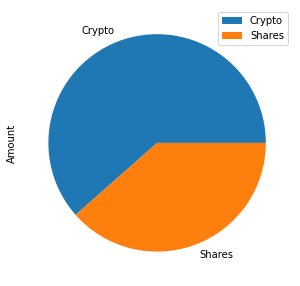

In [14]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True, figsize=(10,5))

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_of_savings=crypto_value+shares_value

# Validate saving health
def saving_health(total_amount_of_savings):
    if total_amount_of_savings > emergency_fund:
        print("Congratulations! You have enough money in this fund")
    elif total_amount_of_savings == emergency_fund:
        print("Congratulations! You reach this financial goal")
    else:
        print("Sorry! You need"+(emergency_fund-total_amount_of_savings)+"dollars to reach your goal" )

saving_health (total_amount_of_savings)

Congratulations! You have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date ='2015-12-01'
end_date =  '2019-11-27'

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# Calculate a new price list of 60%SPY and 40%AGG
SPY60_AGG40_price= alpaca.get_bars(tickers, TimeFrame.Day, start_date, end_date,limit=2000, adjustment='raw').df
SPY60_AGG40_price.index=SPY60_AGG40_price.index.date
SPY60_AGG40_table = pd.pivot_table(SPY60_AGG40_price, values='close', index=SPY60_AGG40_price.index, columns=['symbol'])
SPY60AGG40_portfolio_price=SPY60_AGG40_table["AGG"]*0.4 + SPY60_AGG40_table["SPY"]*0.6
# Display sample data
# In order to fit the Monte Carlo simulation file, I change the columns
SPY60AGG40_portfolio_price=SPY60AGG40_portfolio_price.dropna()
SPY60AGG40_portfolio_price= pd.DataFrame(SPY60AGG40_portfolio_price)
SPY60AGG40_portfolio_price=SPY60AGG40_portfolio_price.set_axis(['close',], axis=1, inplace=False)
micolumns= pd.MultiIndex.from_tuples([("SPYAGG","close")])
SPY60AGG40_portfolio_price.columns=micolumns
SPY60AGG40_portfolio_price.head()

,SPYAGG
,close
2015-12-01,169.936
2015-12-02,168.592
2015-12-03,166.504
2015-12-04,169.092
2015-12-07,168.322


In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
MC_SPYAGG = MCSimulation(portfolio_data = SPY60AGG40_portfolio_price,num_simulation = num_sims,num_trading_days = 252*30)

In [19]:
# Printing the simulation input data
SPY60AGG40_portfolio_price

,SPYAGG
,close
2015-12-01,169.936
2015-12-02,168.592
2015-12-03,166.504
2015-12-04,169.092
2015-12-07,168.322
...,...
2019-11-05,229.110
2019-11-06,229.220
2019-11-07,229.656


In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_SPYAGG.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\User\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993688,0.998221,1.010349,1.005338,1.011133,0.998143,0.998382,1.001020,0.991259,0.994311,...,1.011159,0.995192,1.010372,1.014151,0.988964,1.003950,0.996803,0.996388,0.997272,0.986424
2,0.999552,0.992085,1.020025,0.998987,1.021128,1.006348,1.001315,0.997010,0.985473,0.996394,...,1.005678,0.995451,1.008716,1.018059,0.984558,1.005721,0.988591,1.006925,0.995474,0.990111
3,1.013215,0.996046,1.024132,0.987681,1.017049,1.007792,0.997534,0.995812,0.992670,0.985628,...,1.010589,0.997612,1.009072,1.024386,0.984989,1.011150,0.986434,1.004450,0.995299,0.982905
4,1.010529,0.994418,1.015012,0.980324,1.026116,1.005772,1.002190,0.991407,0.994937,0.981596,...,1.009723,0.985260,1.013823,1.031605,0.985903,1.019780,0.991127,1.003476,0.998618,0.984877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.299836,11.886369,5.078212,5.664172,24.819663,10.280919,15.264353,9.445358,15.261426,4.321680,...,7.911308,3.658347,9.112600,3.264052,18.996120,9.995773,15.784078,7.780844,6.875963,4.833129
7557,14.252986,11.805708,5.055682,5.603498,24.766529,10.185624,15.497929,9.480066,15.183414,4.366282,...,7.905974,3.624081,9.080604,3.240655,18.774433,10.063905,15.628233,7.737980,6.845431,4.828391
7558,14.234808,11.881674,5.061866,5.537945,24.690870,9.998510,15.518061,9.578399,15.131276,4.381578,...,7.936498,3.589743,9.121556,3.208034,18.828051,9.979053,15.706518,7.748766,6.791723,4.772634
7559,14.255103,11.880642,5.063779,5.520698,24.686367,9.918016,15.452601,9.550993,15.262132,4.368763,...,7.897259,3.629568,9.040806,3.206895,18.926921,10.119957,15.596412,7.758262,6.806984,4.807386


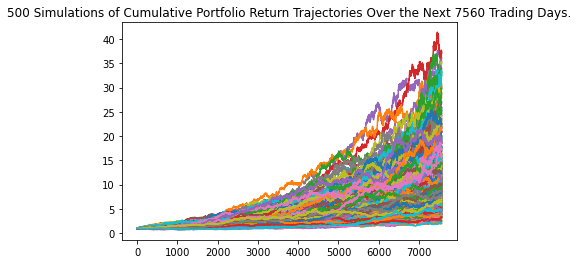

In [21]:
# Plot simulation outcomes
MC_SPYAGG_plot = MC_SPYAGG.plot_simulation()

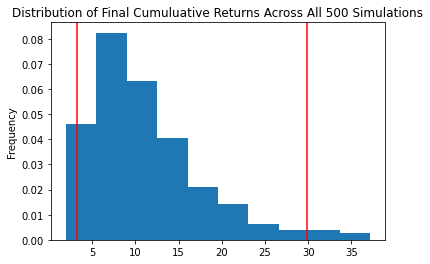

In [22]:
# Plot probability distribution and confidence intervals
MC_SPYAGG_displot = MC_SPYAGG.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_SPYAGG_statistics = MC_SPYAGG.summarize_cumulative_return()

# Print summary statistics
MC_SPYAGG_statistics

count           500.000000
mean             11.314969
std               6.607030
min               1.962251
25%               6.719910
50%               9.608223
75%              14.184167
max              37.163223
95% CI Lower      3.279201
95% CI Upper     29.914343
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
SPYAGG6040_lower = round(MC_SPYAGG_statistics[8]*initial_investment,2)
SPYAGG6040_upper = round(MC_SPYAGG_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${SPYAGG6040_lower} and ${SPYAGG6040_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $65584.03 and $598286.87


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
SPYAGG6040_lower = round(MC_SPYAGG_statistics[8]*initial_investment,2)
SPYAGG6040_upper = round(MC_SPYAGG_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${SPYAGG6040_lower} and ${SPYAGG6040_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $98376.04 and $897430.3


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500
MC5_SPYAGG = MCSimulation(portfolio_data = SPY60AGG40_portfolio_price,num_simulation = num_sims,num_trading_days = 252*5)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC5_SPYAGG.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\User\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997192,0.998142,0.994683,1.003020,0.995921,1.006648,1.006126,1.008976,1.001099,0.994853,...,0.998827,0.997606,1.001651,0.997530,0.994425,0.995339,0.997157,0.992807,1.007317,0.986336
2,1.002338,0.993652,0.990011,1.004832,0.995773,1.004482,1.001725,1.010292,1.005243,0.981973,...,0.984136,1.001093,1.004517,1.006454,0.988846,0.974779,0.994334,0.980902,1.005869,0.990236
3,1.004590,0.992805,0.991700,1.007844,0.992746,1.011739,1.003346,1.004887,1.003891,0.975575,...,0.985421,1.005605,1.003414,1.010618,0.995968,0.977608,0.997631,0.976154,1.002286,0.994082
4,1.010176,0.993786,0.990725,1.007505,0.987276,1.018780,1.014049,1.008750,1.002772,0.972971,...,0.984249,1.014906,0.998086,1.001025,0.990556,0.975683,0.995255,0.986108,0.999547,0.986179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.020033,1.982568,1.980431,2.510345,1.863476,1.758593,1.372020,1.209820,1.619035,2.027771,...,1.402796,1.201922,1.326393,1.139027,1.095906,1.081587,1.626596,1.153975,1.332271,1.482592
1257,2.019117,2.005714,1.985321,2.515426,1.883699,1.781048,1.378336,1.215504,1.607814,2.021075,...,1.404054,1.209723,1.333325,1.141518,1.105156,1.074852,1.634834,1.147342,1.334039,1.477866
1258,2.025935,1.992079,2.012233,2.507109,1.890224,1.787243,1.397421,1.215774,1.604169,2.027196,...,1.399320,1.212351,1.331575,1.139932,1.094752,1.072216,1.634778,1.143042,1.333837,1.472622
1259,2.036970,1.983713,1.988552,2.515505,1.879091,1.778420,1.413026,1.217772,1.608387,2.049042,...,1.407830,1.213394,1.340367,1.143974,1.085254,1.087326,1.634488,1.151810,1.324111,1.467771


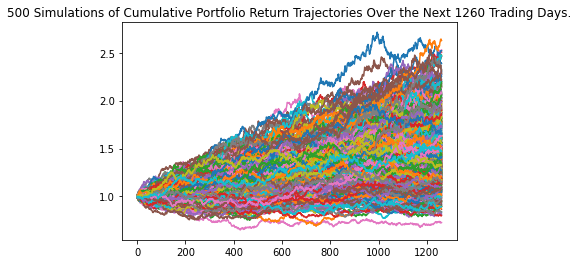

In [28]:
# Plot simulation outcomes
MC5_SPYAGG_plot = MC5_SPYAGG.plot_simulation()

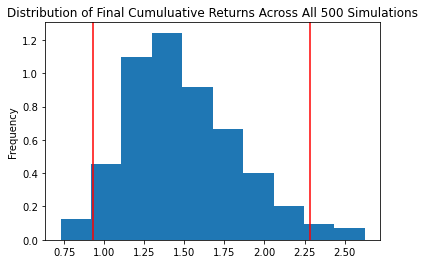

In [29]:
# Plot probability distribution and confidence intervals
MC5_SPYAGG_displot = MC5_SPYAGG.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
MC5_SPYAGG_statistics = MC5_SPYAGG.summarize_cumulative_return()

# Print summary statistics
MC5_SPYAGG_statistics

count           500.000000
mean              1.491571
std               0.343780
min               0.727790
25%               1.242668
50%               1.443159
75%               1.721420
max               2.626677
95% CI Lower      0.929830
95% CI Upper      2.282641
Name: 1260, dtype: float64

In [31]:
# Set initial investment
initial_investment5 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
SPYAGG6040_lower5 = round(MC5_SPYAGG_statistics[8]*initial_investment5,2)
SPYAGG6040_upper5 = round(MC5_SPYAGG_statistics[9]*initial_investment5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${SPYAGG6040_lower5} and ${SPYAGG6040_upper5}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55789.79 and $136958.47


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500
MC10_SPYAGG = MCSimulation(portfolio_data = SPY60AGG40_portfolio_price,num_simulation = num_sims,num_trading_days = 252*10)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC10_SPYAGG.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\User\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007021,1.004272,1.001173,1.003253,0.987897,1.006265,1.011487,1.002359,1.013511,1.003737,...,1.002976,0.996004,1.009582,0.998161,0.996565,1.003170,0.989456,0.991473,0.995551,0.988416
2,1.021174,1.002738,0.983529,1.014186,0.992640,1.008957,1.015917,0.999176,1.013962,1.011501,...,1.009608,1.001945,1.008793,0.995562,0.999408,0.997012,0.990604,0.999126,1.011399,0.990739
3,1.027189,0.996676,0.968810,1.015353,0.986698,1.009148,1.003357,0.989011,1.000480,1.016886,...,1.002453,0.991244,1.006240,0.996651,1.009709,0.996899,0.985942,1.003503,1.008502,1.008645
4,1.030559,1.004357,0.966852,1.013402,0.983274,1.000252,1.001172,0.982696,0.997397,1.024759,...,1.005858,0.990126,0.996629,0.994830,1.004561,1.000382,0.983642,0.996327,1.011387,1.017607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.735238,2.531686,1.710704,1.982597,1.214236,2.359424,1.948346,2.211909,1.927972,2.963749,...,2.170270,1.381170,2.146562,1.347694,3.429649,1.497196,1.682873,2.132885,2.233710,2.122549
2517,2.734979,2.507546,1.696656,1.974025,1.226857,2.373147,1.959300,2.210491,1.927414,2.944725,...,2.164319,1.386053,2.155053,1.353844,3.396288,1.493517,1.679682,2.121876,2.237335,2.129102
2518,2.718138,2.524826,1.721711,1.962283,1.238813,2.360000,1.968963,2.223042,1.920927,2.942447,...,2.166471,1.379738,2.142598,1.365000,3.370844,1.497678,1.694672,2.146326,2.245504,2.137795
2519,2.702330,2.535827,1.717131,1.951163,1.234705,2.371201,1.964528,2.231932,1.903867,2.931201,...,2.166952,1.386811,2.164033,1.374538,3.363950,1.496347,1.708098,2.175951,2.262315,2.133087


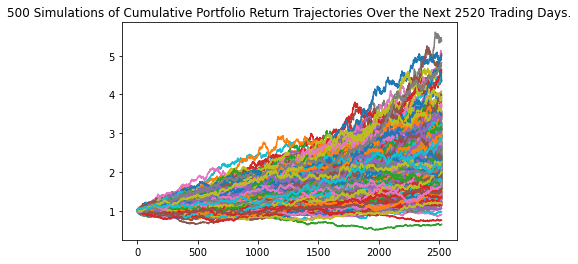

In [34]:
# Plot simulation outcomes
MC10_SPYAGG_plot = MC10_SPYAGG.plot_simulation()

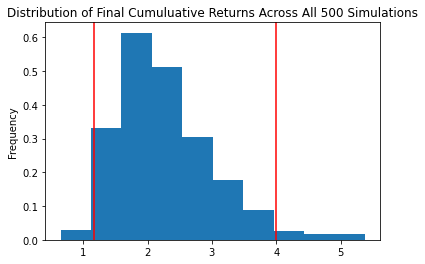

In [35]:
# Plot probability distribution and confidence intervals
MC10_SPYAGG_displot = MC10_SPYAGG.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
MC10_SPYAGG_statistics = MC10_SPYAGG.summarize_cumulative_return()

# Print summary statistics
MC10_SPYAGG_statistics

count           500.000000
mean              2.264080
std               0.752411
min               0.649491
25%               1.742259
50%               2.145608
75%               2.684324
max               5.373961
95% CI Lower      1.169182
95% CI Upper      3.993129
Name: 2520, dtype: float64

In [37]:
# Set initial investment
initial_investment10 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
SPYAGG6040_lower10 = round(MC10_SPYAGG_statistics[8]*initial_investment10,2)
SPYAGG6040_upper10 = round(MC10_SPYAGG_statistics[9]*initial_investment10,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${SPYAGG6040_lower10} and ${SPYAGG6040_upper10}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70150.92 and $239587.76
